In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Loading the dataset into a Pandas DataFrame

In [2]:
df = pd.read_csv("Data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv"
)

In [3]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


 # Summary of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [5]:
df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);

C:\Users\kurtu\AppData\Local\Temp\ipykernel_13652\3608082068.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Low_Confidence_Limit','High_Confidence_Limit ', 'Data_Value_Alt', 'YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);


In [6]:
df.describe()

,YearStart,Data_Value,Sample_Size,LocationID
count,53392.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,31.156681,3889.19286,30.282215
std,1.693300,10.247033,19829.42129,16.821318
min,2011.000000,0.900000,50.00000,1.000000
25%,2012.000000,24.100000,566.00000,17.000000
50%,2013.000000,30.700000,1209.00000,30.000000
75%,2015.000000,37.000000,2519.00000,44.000000
max,2016.000000,77.600000,476876.00000,78.000000


## Standardizing the column names

In [7]:
def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

In [8]:
df=lower_case_column_names(df)
df

,yearstart,locationabbr,locationdesc,question,data_value,sample_size,total,age(years),education,gender,income,race/ethnicity,geolocation,locationid,stratificationcategory1,stratification1
0,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Total,Total
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Less than high school
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,High school graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(18.335765, -64.896335)",78,Race/Ethnicity,Asian
53388,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(18.335765, -64.896335)",78,Race/Ethnicity,Hawaiian/Pacific Islander
53389,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(18.335765, -64.896335)",78,Race/Ethnicity,American Indian/Alaska Native
53390,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(18.335765, -64.896335)",78,Race/Ethnicity,2 or more races


## Checking for duplicate & missing values

In [9]:
print(df.duplicated().sum())

0


In [10]:
df.isna()

,yearstart,locationabbr,locationdesc,question,data_value,sample_size,total,age(years),education,gender,income,race/ethnicity,geolocation,locationid,stratificationcategory1,stratification1
0,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False
2,False,False,False,False,False,False,True,True,True,False,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False
4,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False
53388,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False
53389,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False
53390,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False


In [11]:
df['question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

## Removing outliers

In [12]:
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [13]:
remove_outliers(df)
df

,yearstart,locationabbr,locationdesc,question,data_value,sample_size,total,age(years),education,gender,income,race/ethnicity,geolocation,locationid,stratificationcategory1,stratification1
1,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male
2,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female
3,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Less than high school
4,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,High school graduate
5,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,33.8,1925.0,NaN,NaN,Some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Education,Some college or technical school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asian,"(18.335765, -64.896335)",78,Race/Ethnicity,Asian
53388,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian/Pacific Islander,"(18.335765, -64.896335)",78,Race/Ethnicity,Hawaiian/Pacific Islander
53389,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(18.335765, -64.896335)",78,Race/Ethnicity,American Indian/Alaska Native
53390,2016,VI,Virgin Islands,Percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(18.335765, -64.896335)",78,Race/Ethnicity,2 or more races


## Standardizing the text in the data

In [14]:
def standardize_text(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

In [15]:
standardize_text(df)
df

,yearstart,locationabbr,locationdesc,question,data_value,sample_size,total,age(years),education,gender,income,race/ethnicity,geolocation,locationid,stratificationcategory1,stratification1
1,2011,al,alabama,percent of adults aged 18 years and older who ...,32.3,2581.0,NaN,NaN,NaN,male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,gender,male
2,2011,al,alabama,percent of adults aged 18 years and older who ...,31.8,4723.0,NaN,NaN,NaN,female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,gender,female
3,2011,al,alabama,percent of adults aged 18 years and older who ...,33.6,1153.0,NaN,NaN,less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,education,less than high school
4,2011,al,alabama,percent of adults aged 18 years and older who ...,32.8,2402.0,NaN,NaN,high school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,education,high school graduate
5,2011,al,alabama,percent of adults aged 18 years and older who ...,33.8,1925.0,NaN,NaN,some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,education,some college or technical school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,asian,"(18.335765, -64.896335)",78,race/ethnicity,asian
53388,2016,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hawaiian/pacific islander,"(18.335765, -64.896335)",78,race/ethnicity,hawaiian/pacific islander
53389,2016,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,american indian/alaska native,"(18.335765, -64.896335)",78,race/ethnicity,american indian/alaska native
53390,2016,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 or more races,"(18.335765, -64.896335)",78,race/ethnicity,2 or more races


# Data split for Numerical and Categorical variables

In [16]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical = df[numerical_columns]
numerical

,yearstart,data_value,sample_size,locationid
1,2011,32.3,2581.0,1
2,2011,31.8,4723.0,1
3,2011,33.6,1153.0,1
4,2011,32.8,2402.0,1
5,2011,33.8,1925.0,1
...,...,...,...,...
53387,2016,NaN,NaN,78
53388,2016,NaN,NaN,78
53389,2016,NaN,NaN,78
53390,2016,NaN,NaN,78


In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns
categoricals = df[categorical_columns]
categoricals

,locationabbr,locationdesc,question,total,age(years),education,gender,income,race/ethnicity,geolocation,stratificationcategory1,stratification1
1,al,alabama,percent of adults aged 18 years and older who ...,NaN,NaN,NaN,male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",gender,male
2,al,alabama,percent of adults aged 18 years and older who ...,NaN,NaN,NaN,female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",gender,female
3,al,alabama,percent of adults aged 18 years and older who ...,NaN,NaN,less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",education,less than high school
4,al,alabama,percent of adults aged 18 years and older who ...,NaN,NaN,high school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",education,high school graduate
5,al,alabama,percent of adults aged 18 years and older who ...,NaN,NaN,some college or technical school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",education,some college or technical school
...,...,...,...,...,...,...,...,...,...,...,...,...
53387,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,asian,"(18.335765, -64.896335)",race/ethnicity,asian
53388,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,hawaiian/pacific islander,"(18.335765, -64.896335)",race/ethnicity,hawaiian/pacific islander
53389,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,american indian/alaska native,"(18.335765, -64.896335)",race/ethnicity,american indian/alaska native
53390,vi,virgin islands,percent of adults who engage in no leisure-tim...,NaN,NaN,NaN,NaN,NaN,2 or more races,"(18.335765, -64.896335)",race/ethnicity,2 or more races


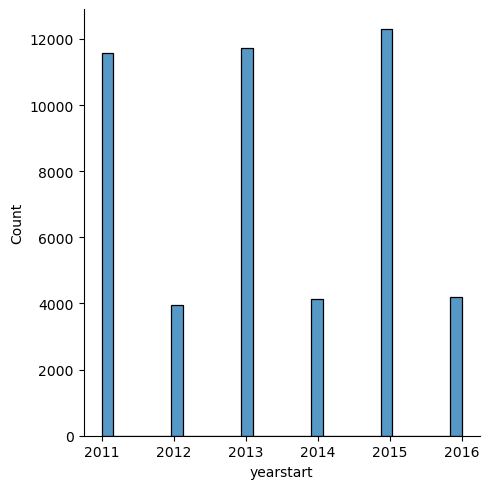

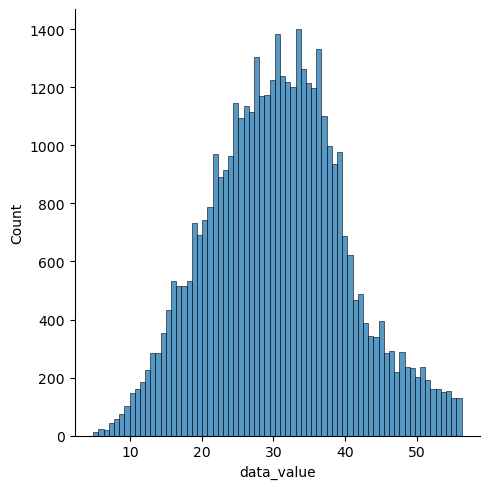

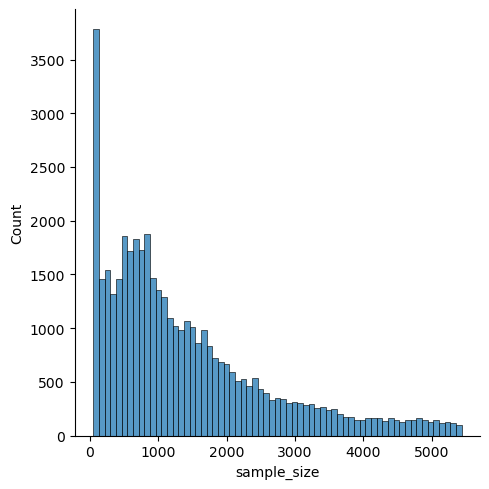

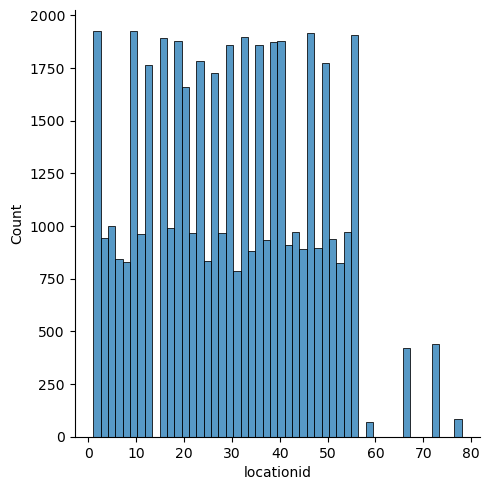

In [18]:
for col in numerical.columns:
    sns.displot(numerical[col])
    plt.show()

In [19]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47875 entries, 1 to 53391
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearstart    47875 non-null  int64  
 1   data_value   42829 non-null  float64
 2   sample_size  42829 non-null  float64
 3   locationid   47875 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.8 MB


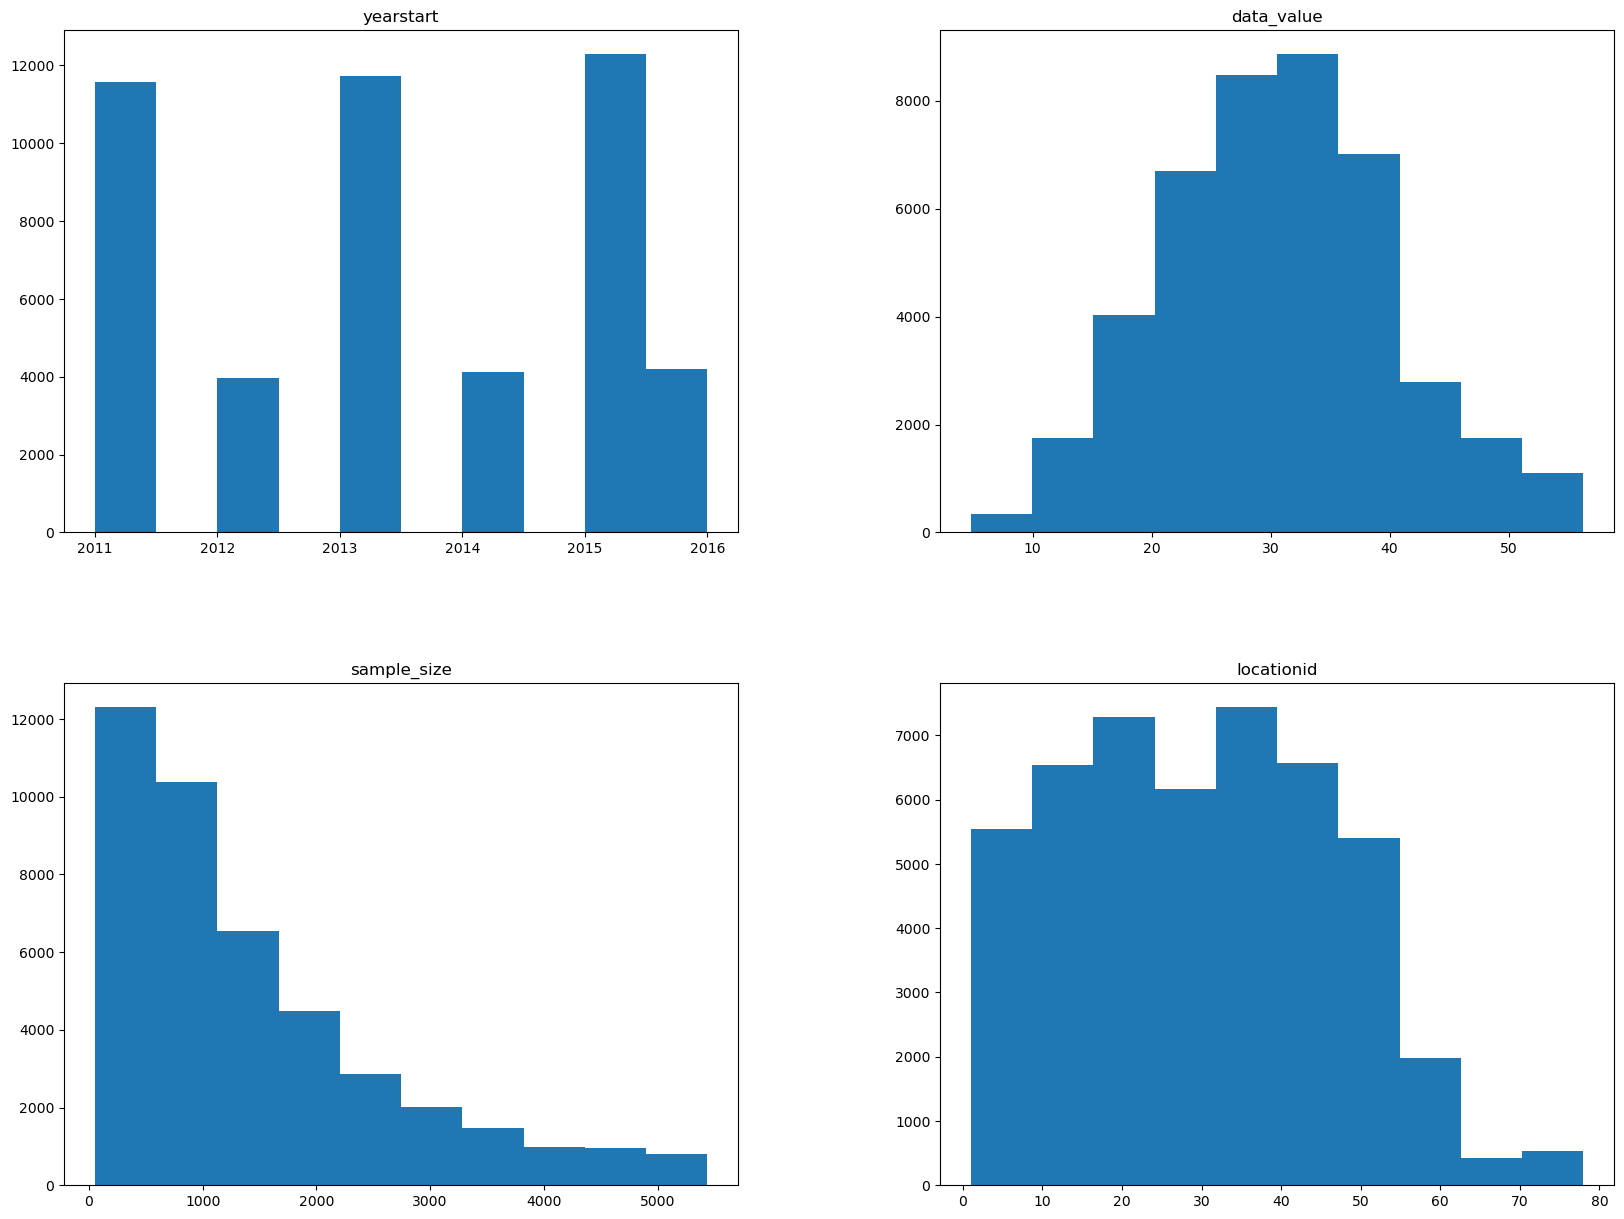

In [20]:
numerical.hist(figsize=(20,15), grid=False)
plt.show()

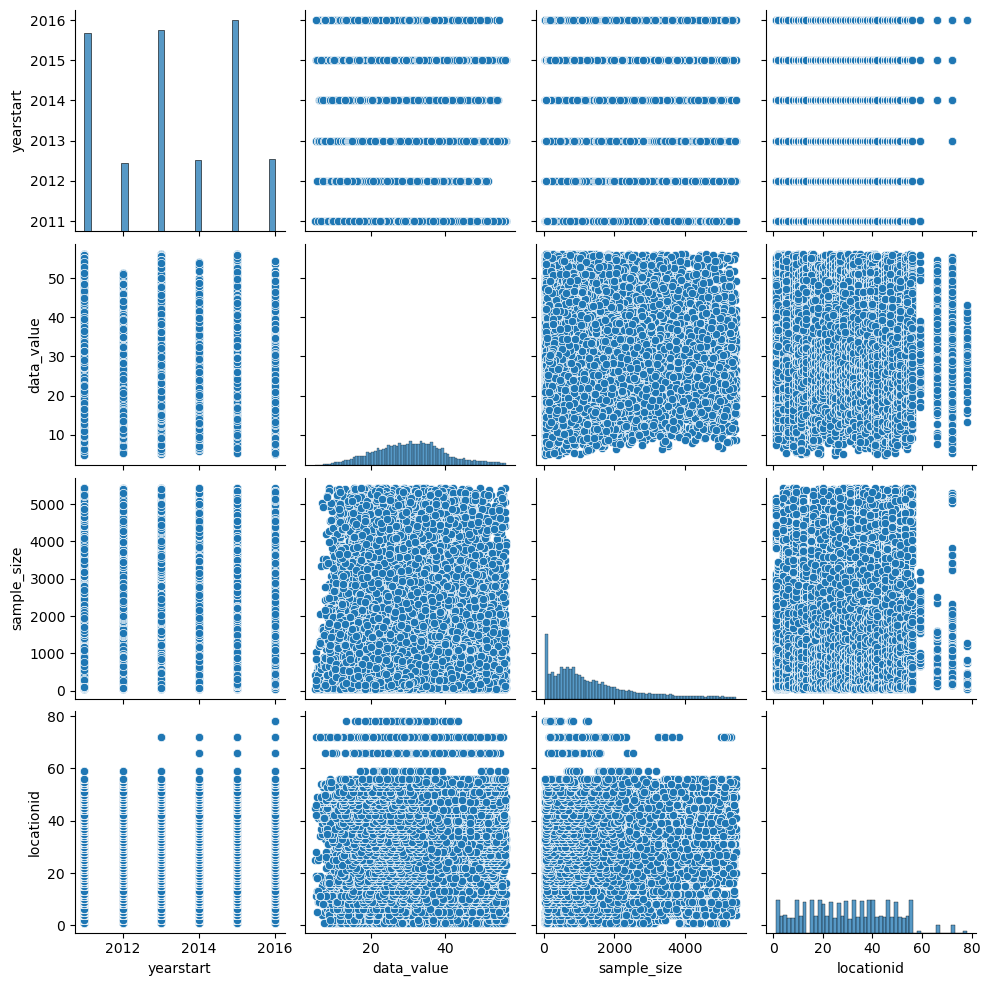

In [21]:
sns.pairplot(numerical)

In [22]:
numerical.corr()

,yearstart,data_value,sample_size,locationid
yearstart,1.000000,0.004871,-0.042571,0.047854
data_value,0.004871,1.000000,-0.023037,0.000900
sample_size,-0.042571,-0.023037,1.000000,-0.001713
locationid,0.047854,0.000900,-0.001713,1.000000


<AxesSubplot:>

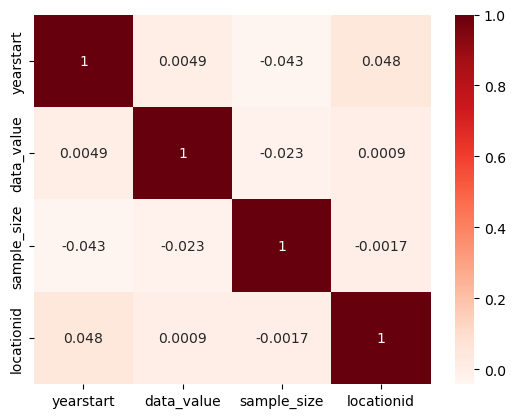

In [23]:
corr = numerical.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True, cmap='Reds')